NAME: Saurabh Nikhil Patil
Roll no: 41
EXP 5 DL

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

# Create the models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)                     │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 784)                 │          50,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,360 (411.56 KB)

 Trainable params: 105,360 (411.56 KB)

 Non-trainable params: 0 (0.00 B)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0483 - val_loss: 0.0135
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0123 - val_loss: 0.0096
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0091 - val_loss: 0.0081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


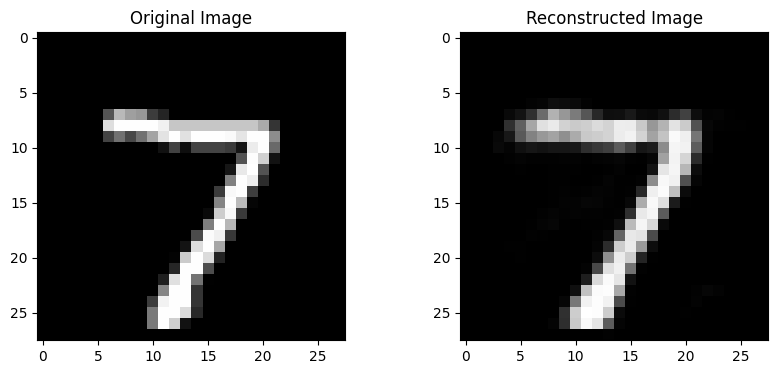

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train / 255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test / 255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

# Add a channel dimension to the images (for grayscale images, it's 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define the encoder
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = keras.layers.Flatten()(encoder_input)
encoder_output = keras.layers.Dense(64, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

# Define the decoder
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)
x = keras.layers.Dense(784, activation="sigmoid")(decoder_input)  # Changed activation to 'sigmoid' for better output reconstruction
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

# Compile the autoencoder
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()
autoencoder.compile(optimizer=opt, loss='mse')

# Train the autoencoder
epochs = 3
for epoch in range(epochs):
    history = autoencoder.fit(
        x_train,
        x_train,
        epochs=1,
        batch_size=32,
        validation_split=0.10
    )
    autoencoder.save(f"models/AE-{epoch+1}.keras")

# Display some test images
plt.figure(figsize=(10, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].reshape((28, 28)), cmap="gray")
plt.title("Original Image")
# Reconstructed image
reconstructed_img = autoencoder.predict(x_test[0:1])
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img[0].reshape((28, 28)), cmap="gray")
plt.title("Reconstructed Image")

plt.show()